In [36]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score

In [37]:
dataset = pd.read_csv('Final_File.csv')
dataset['GarageType'] = dataset['GarageType'].fillna('NO Garage')

In [38]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [39]:
print(X)

[[7 856 1710 ... 'CollgCr' 'Attchd' '2Story']
 [6 1262 1262 ... 'Veenker' 'Attchd' '1Story']
 [7 920 1786 ... 'CollgCr' 'Attchd' '2Story']
 ...
 [7 1152 2340 ... 'Crawfor' 'Attchd' '2Story']
 [5 1078 1078 ... 'NAmes' 'Attchd' '1Story']
 [5 1256 1256 ... 'Edwards' 'Attchd' '1Story']]


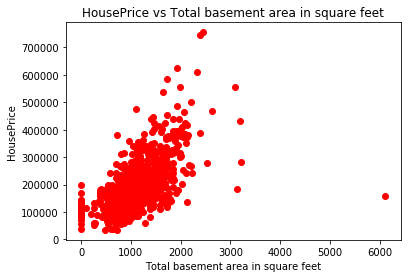

In [40]:
plt.scatter(X[:, 1], y, color = 'red')
plt.title('HousePrice vs Total basement area in square feet')
plt.xlabel('Total basement area in square feet')
plt.ylabel('HousePrice')
plt.show()

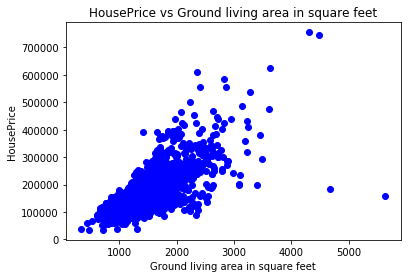

In [41]:
plt.scatter(X[:, 2], y, color = 'blue')
plt.title('HousePrice vs Ground living area in square feet')
plt.xlabel('Ground living area in square feet')
plt.ylabel('HousePrice')
plt.show()

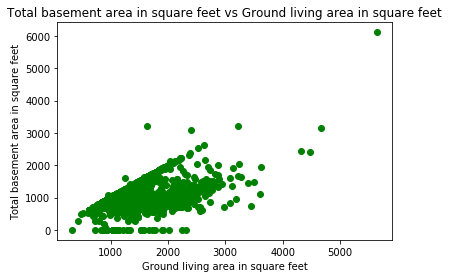

In [42]:
plt.scatter(X[:, 2], X[:, 1], color = 'green')
plt.title('Total basement area in square feet vs Ground living area in square feet')
plt.xlabel('Ground living area in square feet')
plt.ylabel('Total basement area in square feet')
plt.show()

In [43]:
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer.fit(X[:, 0:3])
X[:, 0:3] = imputer.transform(X[:, 0:3])

In [44]:
le = LabelEncoder()

In [45]:
for i in range(3, 8):
    X[:, i] = le.fit_transform(X[:, i])

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [47]:
regressor = RandomForestRegressor(bootstrap = 'True', max_features = 'sqrt', min_samples_split = 4, n_estimators = 100, random_state = 0)
regressor.fit(X_train, y_train)

RandomForestRegressor(bootstrap='True', max_features='sqrt',
                      min_samples_split=4, random_state=0)

In [48]:
y_pred = regressor.predict(X_test)

In [49]:
print(r2_score(y_test, y_pred))

0.8486669233276873


In [50]:
accuracies = cross_val_score(estimator = regressor, X = X_train, y = y_train, cv = 10)
print("Average Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Average Accuracy: 85.02 %
Standard Deviation: 4.18 %


In [52]:
"""import pickle
with open('House_Price_Prediction', 'wb') as f:
    pickle.dump(regressor, f)"""